<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

In [2]:
import pandas as pd
import numpy as np

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nosso objetivo neste exercício é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos utilizar um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning para iniciantes. Este dataset foi modificado para facilitar o nosso objetivo, que é fixar o conhecimento adquirido no treinamento de Regressão Linear.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Siga os passos propostos nos comentários acima de cada célular e bons estudos.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

## Leitura dos dados

Dataset está na pasta "Dados" com o nome "HousePrices_HalfMil.csv" em usa como separador ";".

In [3]:
path = '..\data\HousePrices_HalfMil.csv'

In [6]:
df = pd.read_csv(path, sep=';')

## Visualizar os dados

In [7]:
df.head()

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1


## Verificando o tamanho do dataset

In [8]:
df.shape

(1000, 7)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
precos,1000.0,41985.600,12140.385408,13150.0,33112.50,41725.0,51175.0,73675.0
area,1000.0,124.326,72.389972,1.0,60.75,123.0,187.0,249.0
garagem,1000.0,2.009,0.813376,1.0,1.00,2.0,3.0,3.0
banheiros,1000.0,3.000,1.429701,1.0,2.00,3.0,4.0,5.0
lareira,1000.0,2.034,1.418752,0.0,1.00,2.0,3.0,4.0
marmore,1000.0,0.331,0.470809,0.0,0.00,0.0,1.0,1.0
andares,1000.0,0.485,0.500025,0.0,0.00,0.0,1.0,1.0


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

### Observe as correlações entre as variáveis:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Quais são mais correlacionadas com a variável dependete (Preço)?</li>
    <li>Qual o relacionamento entre elas (positivo ou negativo)?</li>
    <li>Existe correlação forte entre as variáveis explicativas?</li>
</ul>

In [18]:
df.corr()

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.000000,0.117689,0.102752,0.124390,0.107209,0.430767,0.631529
area,0.117689,1.000000,-0.007530,-0.011374,0.012114,-0.015270,-0.018006
garagem,0.102752,-0.007530,1.000000,0.067142,0.060455,-0.015629,-0.020588
banheiros,0.124390,-0.011374,0.067142,1.000000,0.048363,-0.025281,-0.018203
lareira,0.107209,0.012114,0.060455,0.048363,1.000000,0.029591,-0.003513
marmore,0.430767,-0.015270,-0.015629,-0.025281,0.029591,1.000000,-0.006527
andares,0.631529,-0.018006,-0.020588,-0.018203,-0.003513,-0.006527,1.000000


In [25]:
df.corr()[0:1]

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.0,0.117689,0.102752,0.12439,0.107209,0.430767,0.631529


# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

<img width='700px' src='../Dados/img/Box-Plot.png'>

## Importando biblioteca seaborn

In [26]:
import seaborn as sns

## Configure o estilo e cor dos gráficos (opcional)

In [27]:
sns.set_palette('Spectral_r')
sns.set_style('darkgrid')

## Box plot da variável *dependente* (y)


### Avalie o comportamento da distribuição da variável dependente:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Parecem existir valores discrepantes (outliers)?</li>
    <li>O box plot apresenta alguma tendência?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

<AxesSubplot: title={'center': 'Distribuicao dos Precos de Imoveis'}, xlabel='R$'>

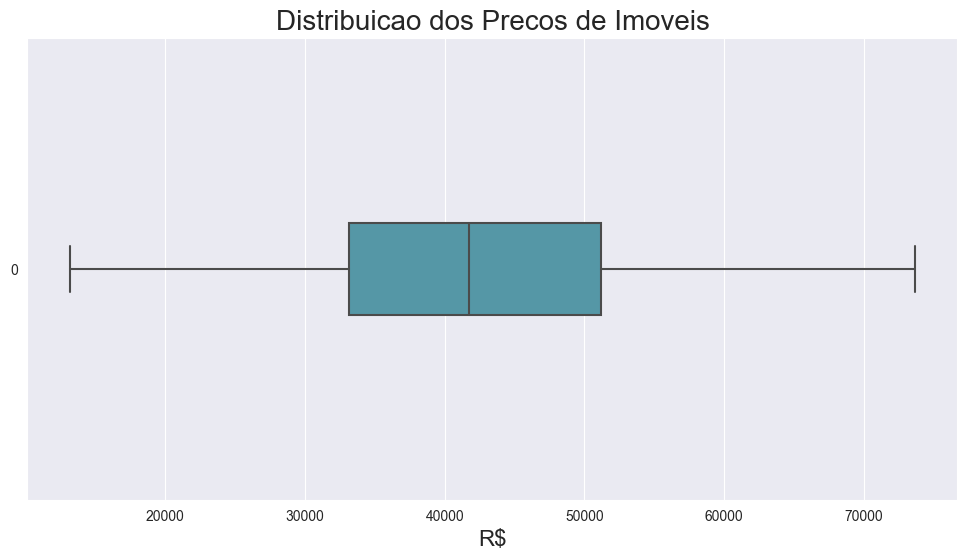

In [33]:
ax = sns.boxplot(df.precos, orient='h', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuicao dos Precos de Imoveis', fontsize=20)
ax.set_xlabel('R$', fontsize=16)
ax

## Investigando a variável *dependente* (y) juntamente com outras característica

Faça um box plot da variável dependente em conjunto com cada variável explicativa (somente as categóricas).

### Avalie o comportamento da distribuição da variável dependente com cada variável explicativa categórica:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>As estatísticas apresentam mudança significativa entre as categorias?</li>
    <li>O box plot apresenta alguma tendência bem definida?</li>
</ul>

### Box-plot (Preço X Garagem)

<AxesSubplot: title={'center': 'Distribuicao dos Precos de Imoveis'}, xlabel='R$', ylabel='Vagas na Garagem'>

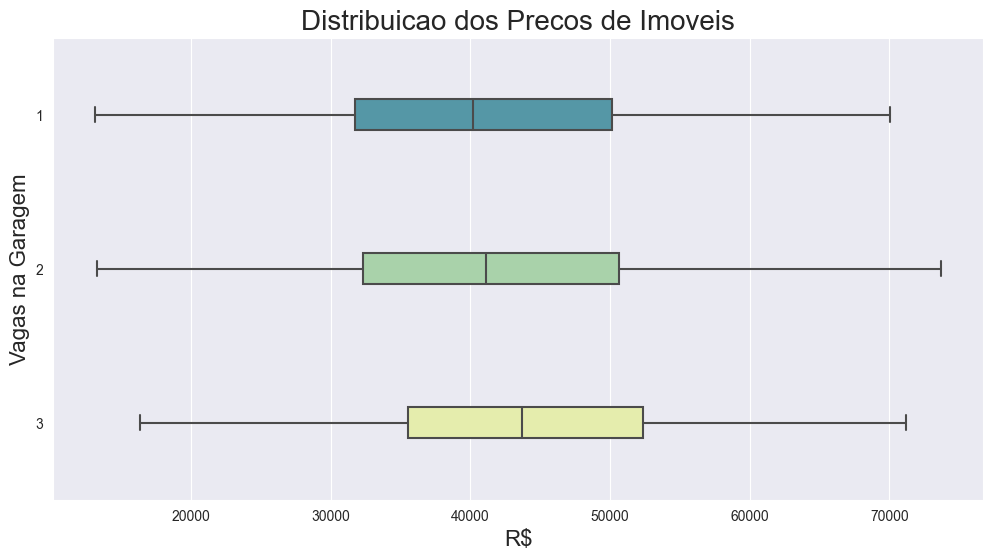

In [37]:
ax = sns.boxplot(x=df.precos, y=df.garagem, orient='h', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuicao dos Precos de Imoveis', fontsize=20)
ax.set_xlabel('R$', fontsize=16)
ax.set_ylabel('Vagas na Garagem', fontsize=16)
ax

### Box-plot (Preço X Banheiros)

<AxesSubplot: title={'center': 'Distribuicao dos Precos de Imoveis'}, xlabel='R$', ylabel='Banheiros'>

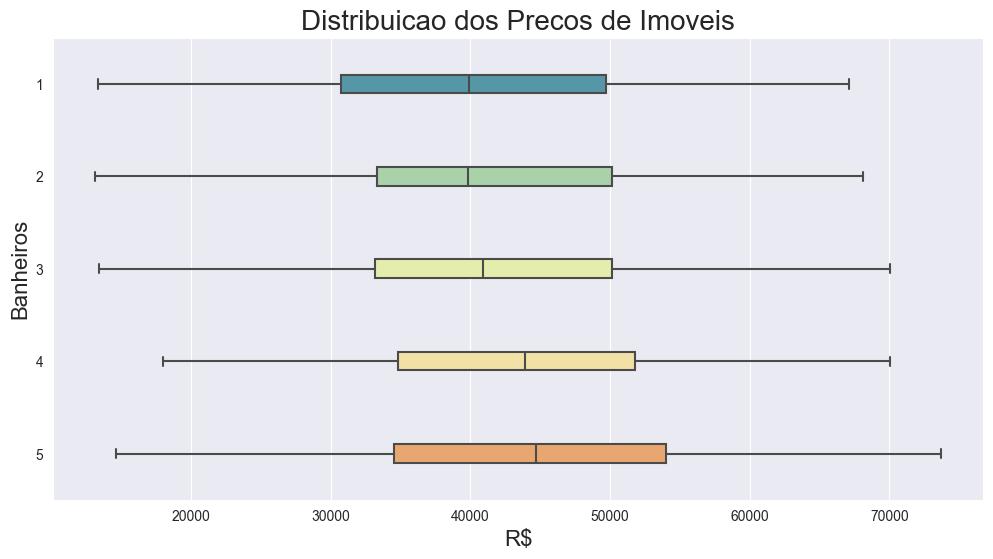

In [38]:
ax = sns.boxplot(x=df.precos, y=df.banheiros, orient='h', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuicao dos Precos de Imoveis', fontsize=20)
ax.set_xlabel('R$', fontsize=16)
ax.set_ylabel('Banheiros', fontsize=16)
ax

### Box-plot (Preço X Lareira)

<AxesSubplot: title={'center': 'Distribuicao dos Precos de Imoveis'}, xlabel='R$', ylabel='Tem Lareira'>

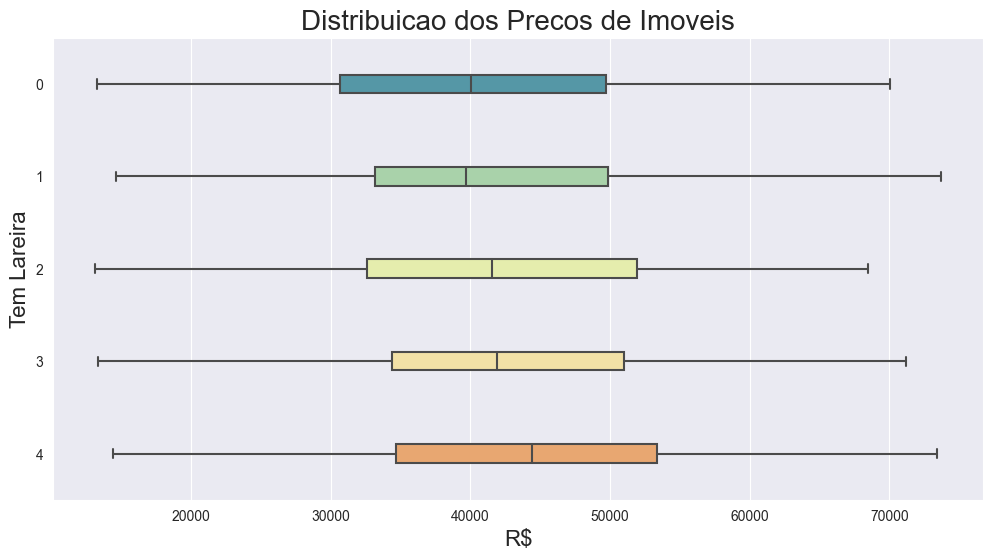

In [39]:
ax = sns.boxplot(x=df.precos, y=df.lareira, orient='h', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuicao dos Precos de Imoveis', fontsize=20)
ax.set_xlabel('R$', fontsize=16)
ax.set_ylabel('Tem Lareira', fontsize=16)
ax

### Box-plot (Preço X Acabamento em Mármore)

<AxesSubplot: title={'center': 'Distribuicao dos Precos de Imoveis'}, xlabel='R$', ylabel='Tem Marmore'>

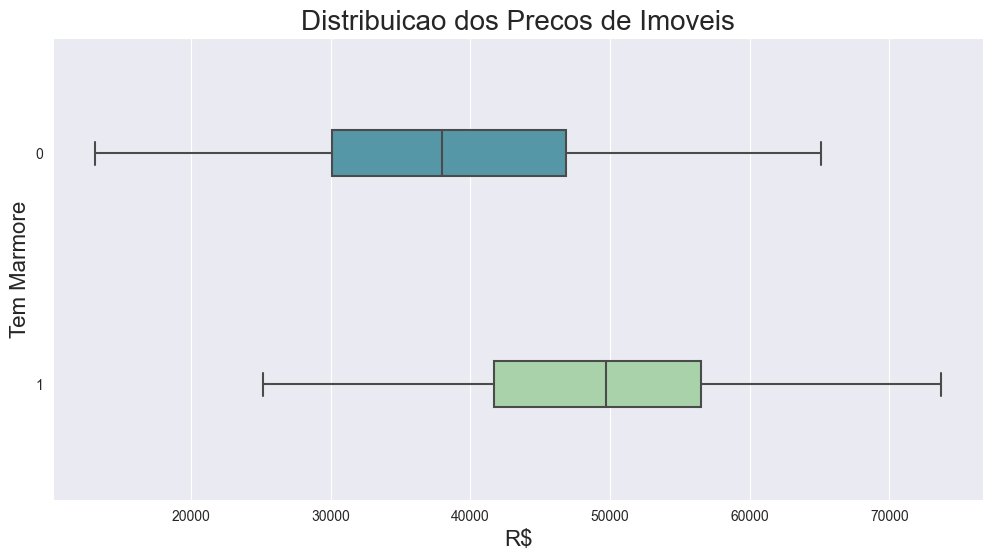

In [40]:
ax = sns.boxplot(x=df.precos, y=df.marmore, orient='h', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuicao dos Precos de Imoveis', fontsize=20)
ax.set_xlabel('R$', fontsize=16)
ax.set_ylabel('Tem Marmore', fontsize=16)
ax

### Box-plot (Preço X Andares)

<AxesSubplot: title={'center': 'Distribuicao dos Precos de Imoveis'}, xlabel='R$', ylabel='Mais de um Andar'>

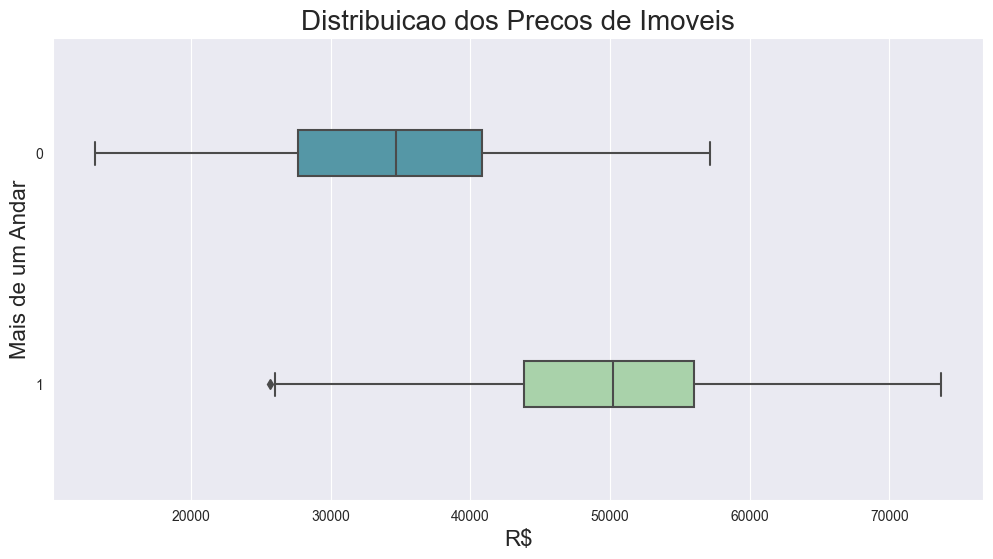

In [42]:
ax = sns.boxplot(x=df.precos, y=df.andares, orient='h', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuicao dos Precos de Imoveis', fontsize=20)
ax.set_xlabel('R$', fontsize=16)
ax.set_ylabel('Mais de um Andar', fontsize=16)
ax

## Distribuição de frequências da variável *dependente* (y)

Construa um histograma da variável dependente (Preço).

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>A distribuição de frequências da variável dependente parece ser assimétrica?</li>
    <li>É possível supor que a variável dependente segue uma distribuição normal?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

<AxesSubplot: title={'center': 'Distribuicao do Preco'}, xlabel='precos', ylabel='R$'>

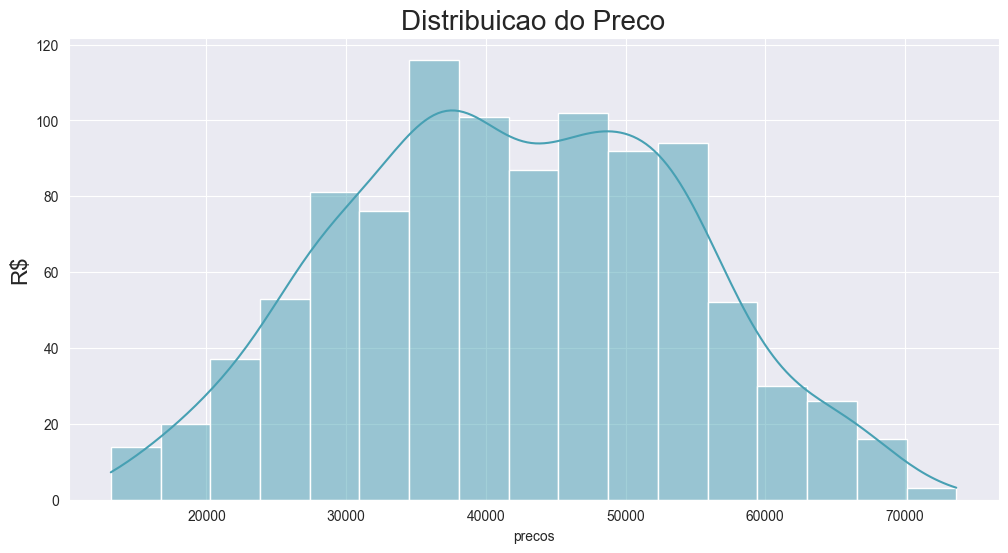

In [46]:
ax = sns.histplot(df.precos, kde=True)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuicao do Preco', fontsize=20)
ax.set_ylabel('R$', fontsize=16)
ax

## Gráficos de dispersão entre as variáveis do dataset

## Plotando o pairplot fixando somente uma variável no eixo y

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

Plote gráficos de dispersão da variável dependente contra cada variável explicativa. Utilize o pairplot da biblioteca seaborn para isso.

Plote o mesmo gráfico utilizando o parâmetro kind='reg'.

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>É possível identificar alguma relação linear entre as variáveis?</li>
    <li>A relação é positiva ou negativa?</li>
    <li>Compare com os resultados obtidos na matriz de correlação.</li>
</ul>

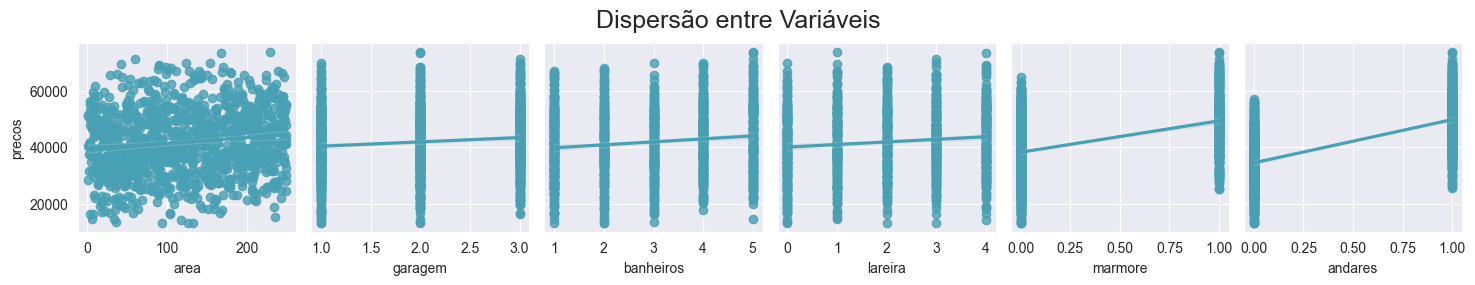

In [47]:
ax = sns.pairplot(df, y_vars=['precos'], x_vars=df.columns[1:], kind='reg')
ax.fig.suptitle('Dispersão entre Variáveis', fontsize=18, y=1.1)
ax

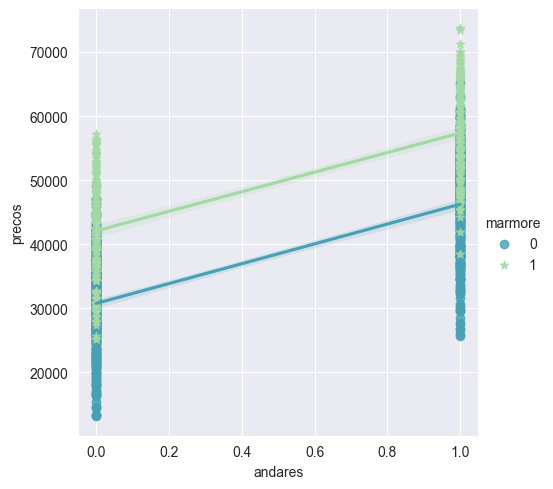

In [48]:
ax = sns.lmplot(x='andares',y='precos', data=df, hue='marmore', markers=['o','*'])

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear</font>
<hr style='border: 2px solid red;'>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [49]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar a variável dependente (y)

In [50]:
y = df.precos

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [51]:
X = df[['marmore', 'andares']]
X2 = df.iloc[:,1:]

## Criando os datasets de treino e de teste

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state = 2811)

In [54]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3,
                                                        random_state = 2811)

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [56]:
lr = LinearRegression()
lr2 = LinearRegression()

## Utilizando o método *fit()* para estimar o modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [57]:
model = lr.fit(X_train, y_train)
model2 = lr2.fit(X2_train, y2_train)

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score


### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>O modelo apresenta um bom ajuste?</li>
    <li>Você lembra o que representa o R²?</li>
    <li>Qual medida podemos tomar para melhorar essa estatística?</li>
</ul>

In [59]:
y_pred_train = model.predict(X_train)
y2_pred_train = model2.predict(X2_train)

In [60]:
print(f'Selected Dataframe: R² = {metrics.r2_score(y_train, y_pred_train):.2f}')
print(f'All Dataframe: R² = {metrics.r2_score(y2_train, y2_pred_train):.2f}')

Selected Dataframe: R² = 0.57
All Dataframe: R² = 0.64


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [61]:
y_pred = model.predict(X_test)
y2_pred = model2.predict(X2_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [63]:
MSE = metrics.mean_squared_error(y_test, y_pred).round(2)
RMSE = np.sqrt(MSE).round(2)
R2 = metrics.r2_score(y_test, y_pred).round(2)

pd.DataFrame([R2,MSE,RMSE], index=['R²','MSE','RMSE'], columns=['Values'])

,Values
R²,0.63
MSE,55589984.59
RMSE,7455.87


In [64]:
MSE_2 = metrics.mean_squared_error(y2_test, y2_pred).round(2)
RMSE_2 = np.sqrt(MSE_2).round(2)
R2_2 = metrics.r2_score(y2_test, y2_pred).round(2)

pd.DataFrame([R2_2,MSE_2,RMSE_2], index=['R²','MSE','RMSE'], columns=['Values'])

,Values
R²,0.67
MSE,50197019.50
RMSE,7084.99


# <font color='red' style='font-size: 30px;'>Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Importando a biblioteca pickle

In [65]:
import pickle

## Salvando o modelo estimado

In [66]:
output = open('models/model_house_price', 'wb')

pickle.dump(model2, output)

output.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_preço','rb')
lm_new = pickle.load(modelo)
modelo.close()

area = 38
garagem = 2
banheiros = 4
lareira = 4
marmore = 0
andares = 1

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
$ 46389.80
```